### Explotary Data Analysis and Machine Learning Model of Iris DataSet 

Iris Data sets contains three different types of irises (setosa, Versicolour and Virginica) rows beings of the sample 
and columns beings Sepal Length, Sepal Width, Petal width and Petal Width.


####  Import useful impotent library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#### Load Data and first five observations

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Number of instances (samples) and Features (variables) of this dataset

In [172]:
print('No. of Sample :', iris.shape[0])
print('No of Variables :',iris.shape[1])

No. of Sample : 150
No of Variables : 5


#### Basic information of the data

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Four importent variables [sepal length, sepal width, petal length and patal width] for classification of species.

#### Data Description 

In [90]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Number of Sample of each species group

In [173]:
data_count = iris.species.value_counts()
print(data_count)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


#### Graphical Representation 

Text(0, 0.5, '')

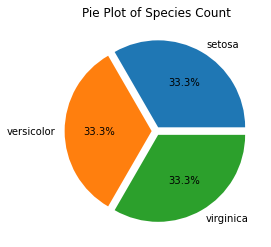

In [174]:
plot_1 = data_count.plot(kind = 'pie',title = 'Pie Plot of Species Count', explode = [0.05,0.05,0.05], autopct='%1.1f%%')
plot_1.yaxis.set_label_text("")

Number of samples of each groups are same 

#### Scatter plot between Sepal length and sepal width

[Text(0.5, 1.0, 'Scatter Plot between Sepal Length and Sepal Width')]

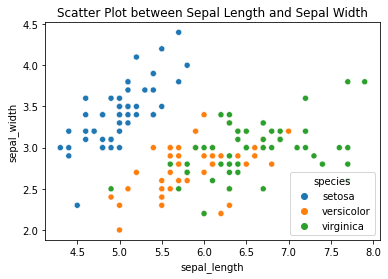

In [19]:
plot_2 = sns.scatterplot(x = 'sepal_length' , y = 'sepal_width', data = iris, hue = 'species')
plot_2.set(title = 'Scatter Plot between Sepal Length and Sepal Width')

#### Side by Side scatter plot of petal length and petal width accroding to each species 

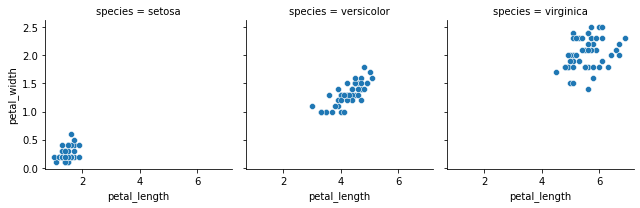

In [27]:
base = sns.FacetGrid(data = iris, col = 'species')
base.map(sns.scatterplot , 'petal_length', 'petal_width')

setosa are correctly classified versicolor and virginica little bit of overlap so probability of misclassifiaction also given

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

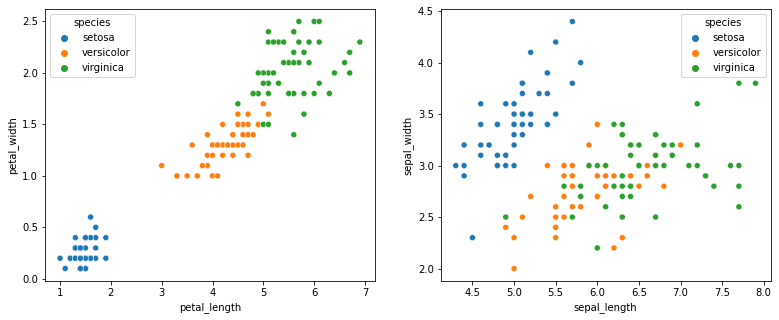

In [39]:
fig, axs = plt.subplots(ncols=2, figsize = (13,5))
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', ax=axs[0])
sns.scatterplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species', ax=axs[1])

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

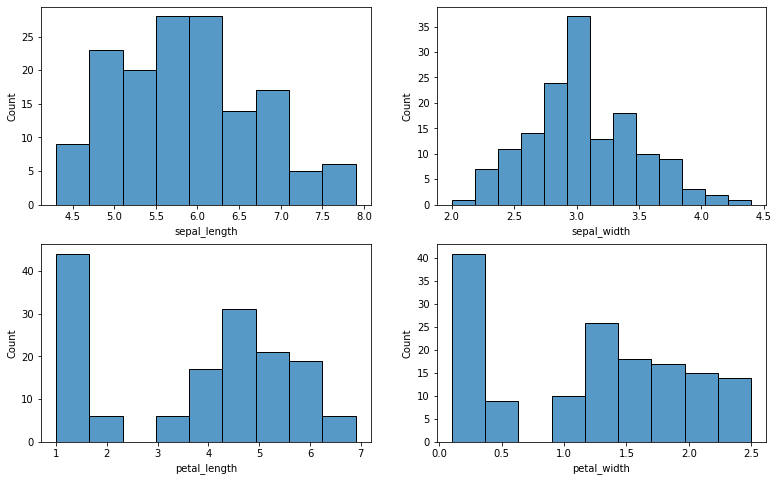

In [61]:
fix, axs = plt.subplots(2,2, figsize = (13,8))
sns.histplot(data = iris, x = 'sepal_length', ax = axs[0,0])
sns.histplot(data = iris, x = 'sepal_width',  ax = axs[0,1])
sns.histplot(data = iris, x = 'petal_length', ax = axs[1,0])
sns.histplot(data = iris, x = 'petal_width',  ax = axs[1,1])

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

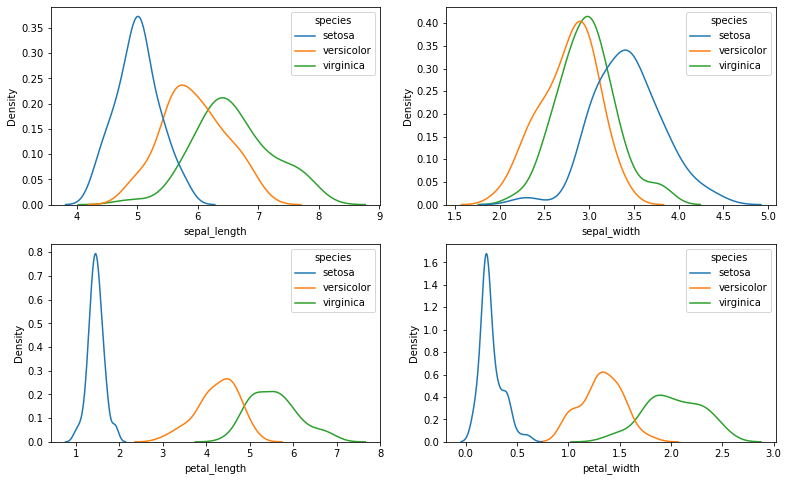

In [86]:
fix, axs = plt.subplots(2,2, figsize = (13,8))
sns.kdeplot(data = iris, x = 'sepal_length', ax = axs[0,0], hue = 'species')
sns.kdeplot(data = iris, x = 'sepal_width',  ax = axs[0,1], hue = 'species')
sns.kdeplot(data = iris, x = 'petal_length', ax = axs[1,0], hue = 'species')
sns.kdeplot(data = iris, x = 'petal_width',  ax = axs[1,1], hue = 'species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

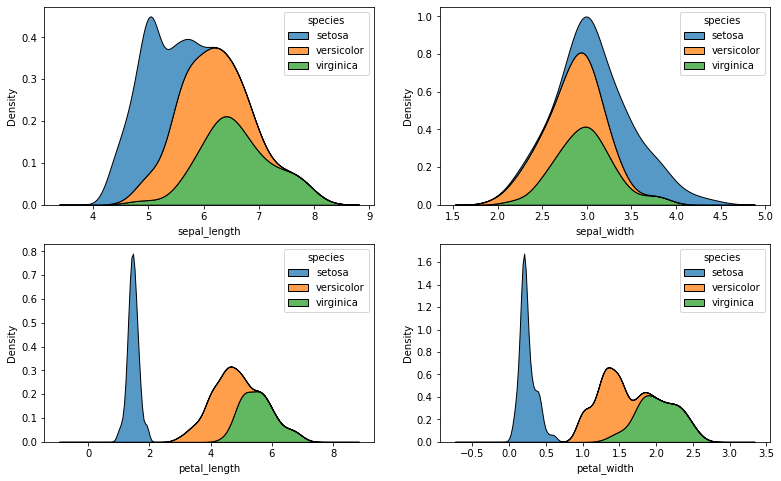

In [83]:
fix, axs = plt.subplots(2,2, figsize = (13,8))
sns.kdeplot(data = iris, x = 'sepal_length', ax = axs[0,0], hue = 'species', multiple = 'stack')
sns.kdeplot(data = iris, x = 'sepal_width',  ax = axs[0,1], hue = 'species', multiple = 'stack')
sns.kdeplot(data = iris, x = 'petal_length', ax = axs[1,0], hue = 'species', multiple = 'stack')
sns.kdeplot(data = iris, x = 'petal_width',  ax = axs[1,1], hue = 'species', multiple = 'stack')

### Machine Learning Model

Split whole Dataset into train and Test methods randomly 70 percent are train data and 30 percent are test data.
Model create using train data and performence cheack by test data.

In [133]:
np.random.seed(123)
from sklearn.model_selection import train_test_split
x = iris.drop(columns=['species'])
y = iris['species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [134]:
print('Number of instance and Feature of train: ', x_train.shape)
print('Number of instance and Feature of test : ', x_test.shape)

Number of instance and Feature of train:  (105, 4)
Number of instance and Feature of test :  (45, 4)


#### Supervise Learning (Classification)

Iris data is a label data here we know the species and corresponsing four features. Our aim is to correctly classify where a 
new observation sepal length, sepal width and  petal length and petal width given. 

#### k nearest neighbor

Nearest neighbor algorithm basically returns the training example which is at the least distance from the given test sample. k-Nearest neighbor returns k(a positive integer) training examples at least distance from given test sample.

In [184]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [185]:
print('Acuracy of test data :', model.score(x_test, y_test))
print('Acuracy of full data :', model.score(x, y))

Acuracy of test data : 0.9777777777777777
Acuracy of full data : 0.98


In [210]:
predict = model.predict(x_test)
actual  = list(y_test)

#### Number of misclassification 

In [211]:
count = 0
for i in range(len(predict)):
    if predict[i] != actual[i]:
        count +=1
count

1

#### Confusion Matrix

In [213]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(predict,actual)
matrix

array([[18,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 17]], dtype=int64)

Its vary interesting and joyful only one observation are miss classified other wise its amazing. 